In [1]:
import scanpy as sc

In [11]:
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


# Step 1: Filtering

In [3]:
filtered_adata = sc.pp.recipe_zheng17(adata, copy= True)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


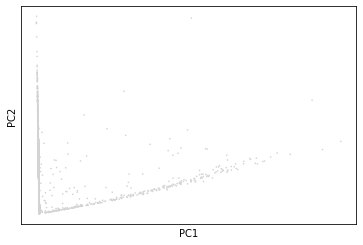

In [4]:
#pca on unfiltered data
pca = sc.tl.pca(adata)
pca = sc.pl.pca(adata)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


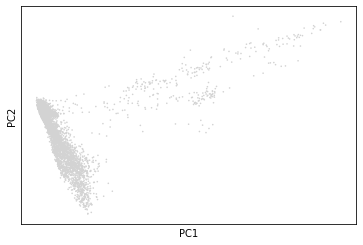

In [5]:
#pca on filtered data
filtered_pca = sc.tl.pca(filtered_adata)
filtered_pca = sc.pl.pca(filtered_adata)

# Step 2: Clustering

In [12]:
sc.pp.neighbors(filtered_adata)
sc.tl.leiden(filtered_adata)

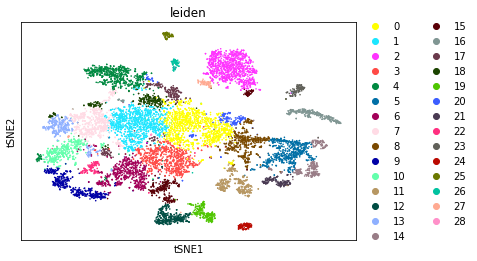

In [7]:
#t-SNE
sc.tl.tsne(filtered_adata)
sc.pl.tsne(filtered_adata, color = 'leiden')

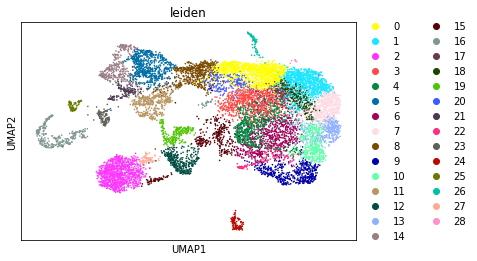

In [8]:
#UMAP
sc.tl.umap(filtered_adata)
sc.pl.umap(filtered_adata, color ='leiden')

# Step 3: Distinguishing Genes

# t-test

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


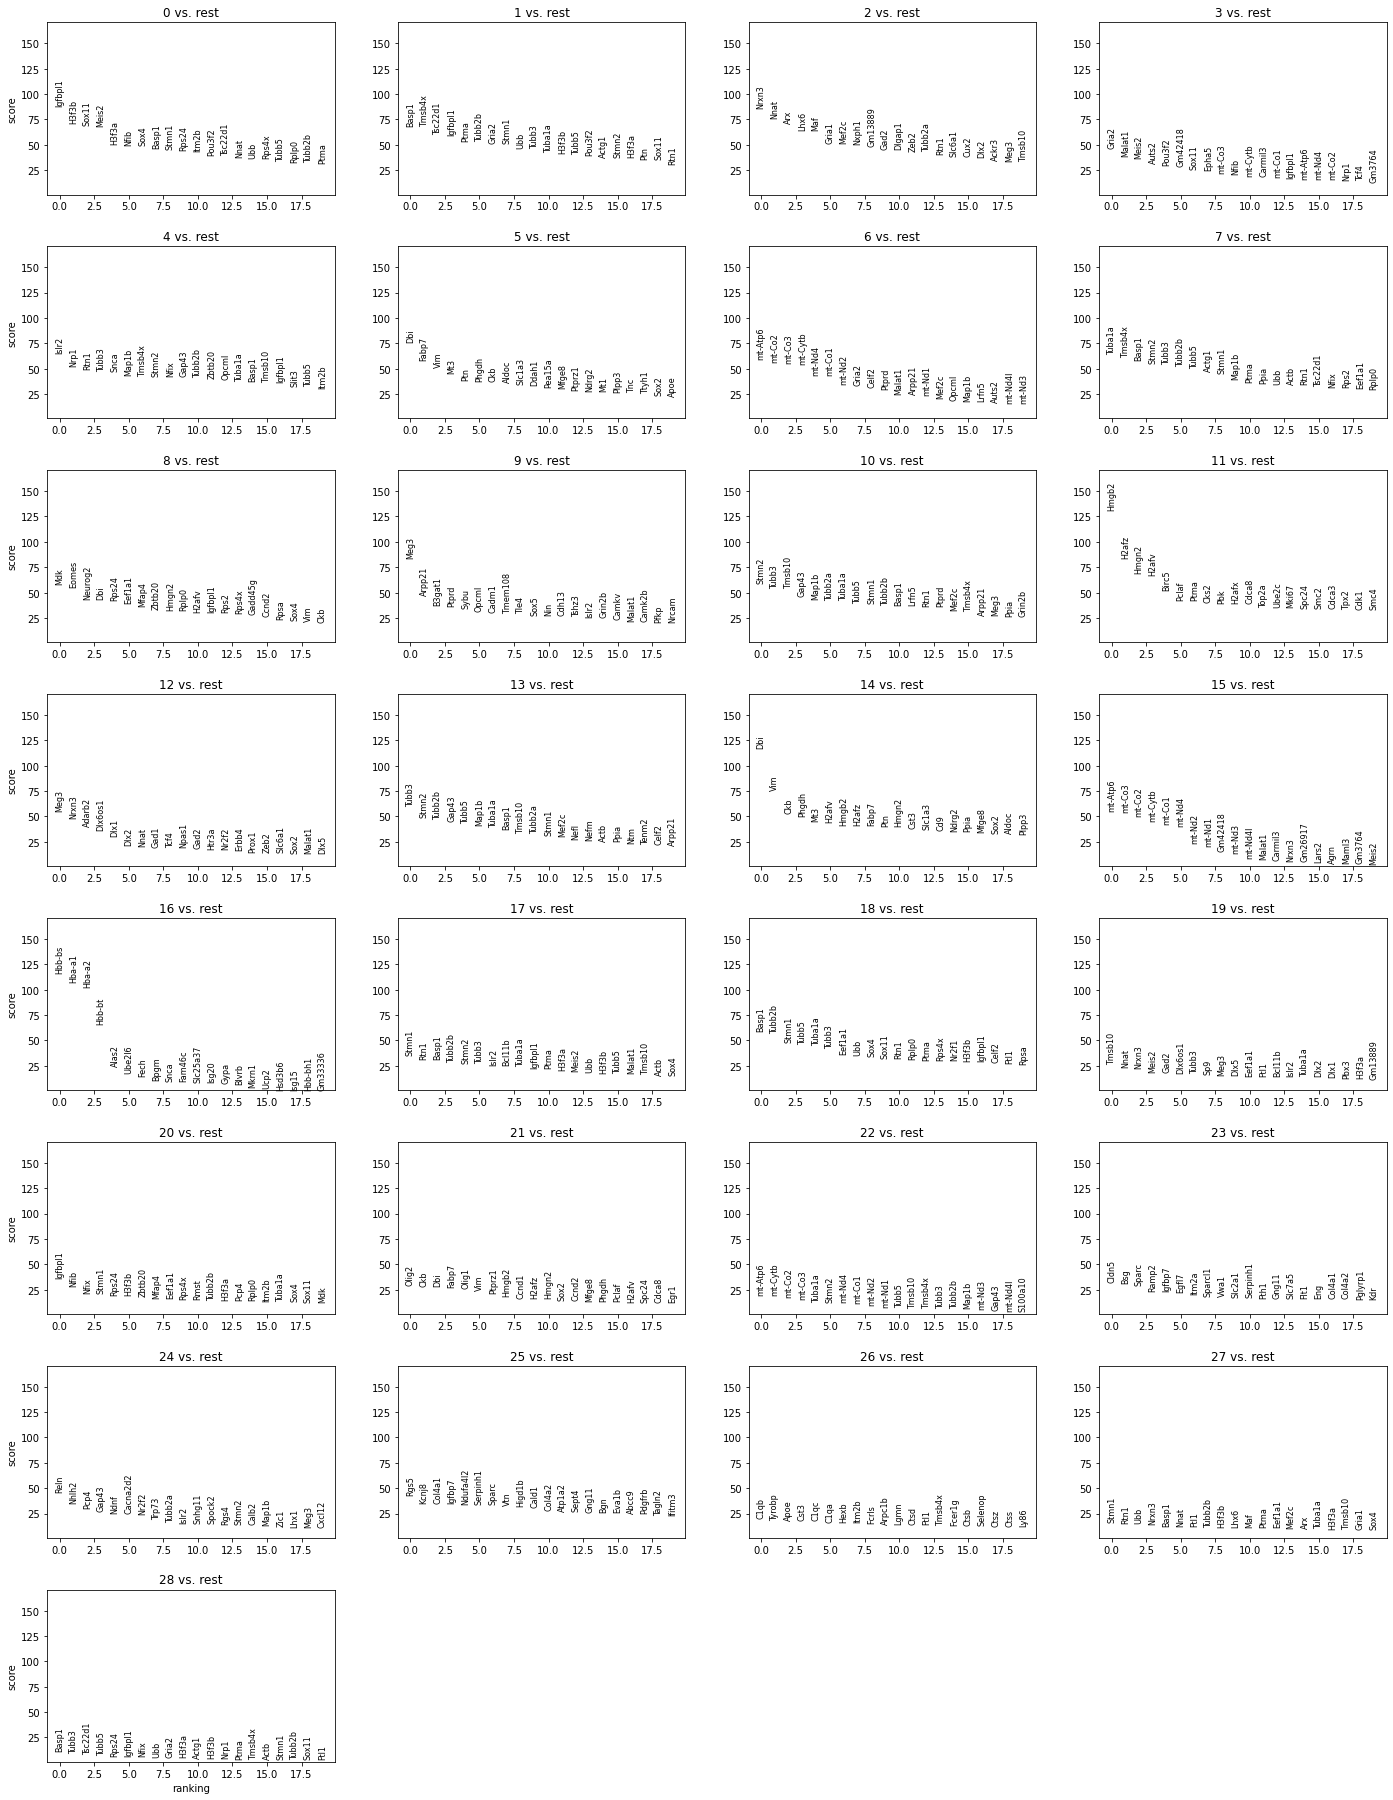

In [9]:
sc.tl.rank_genes_groups(filtered_adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(filtered_adata)

# Logistic Regression

/Users/cmdb/miniconda3/envs/scanpy/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


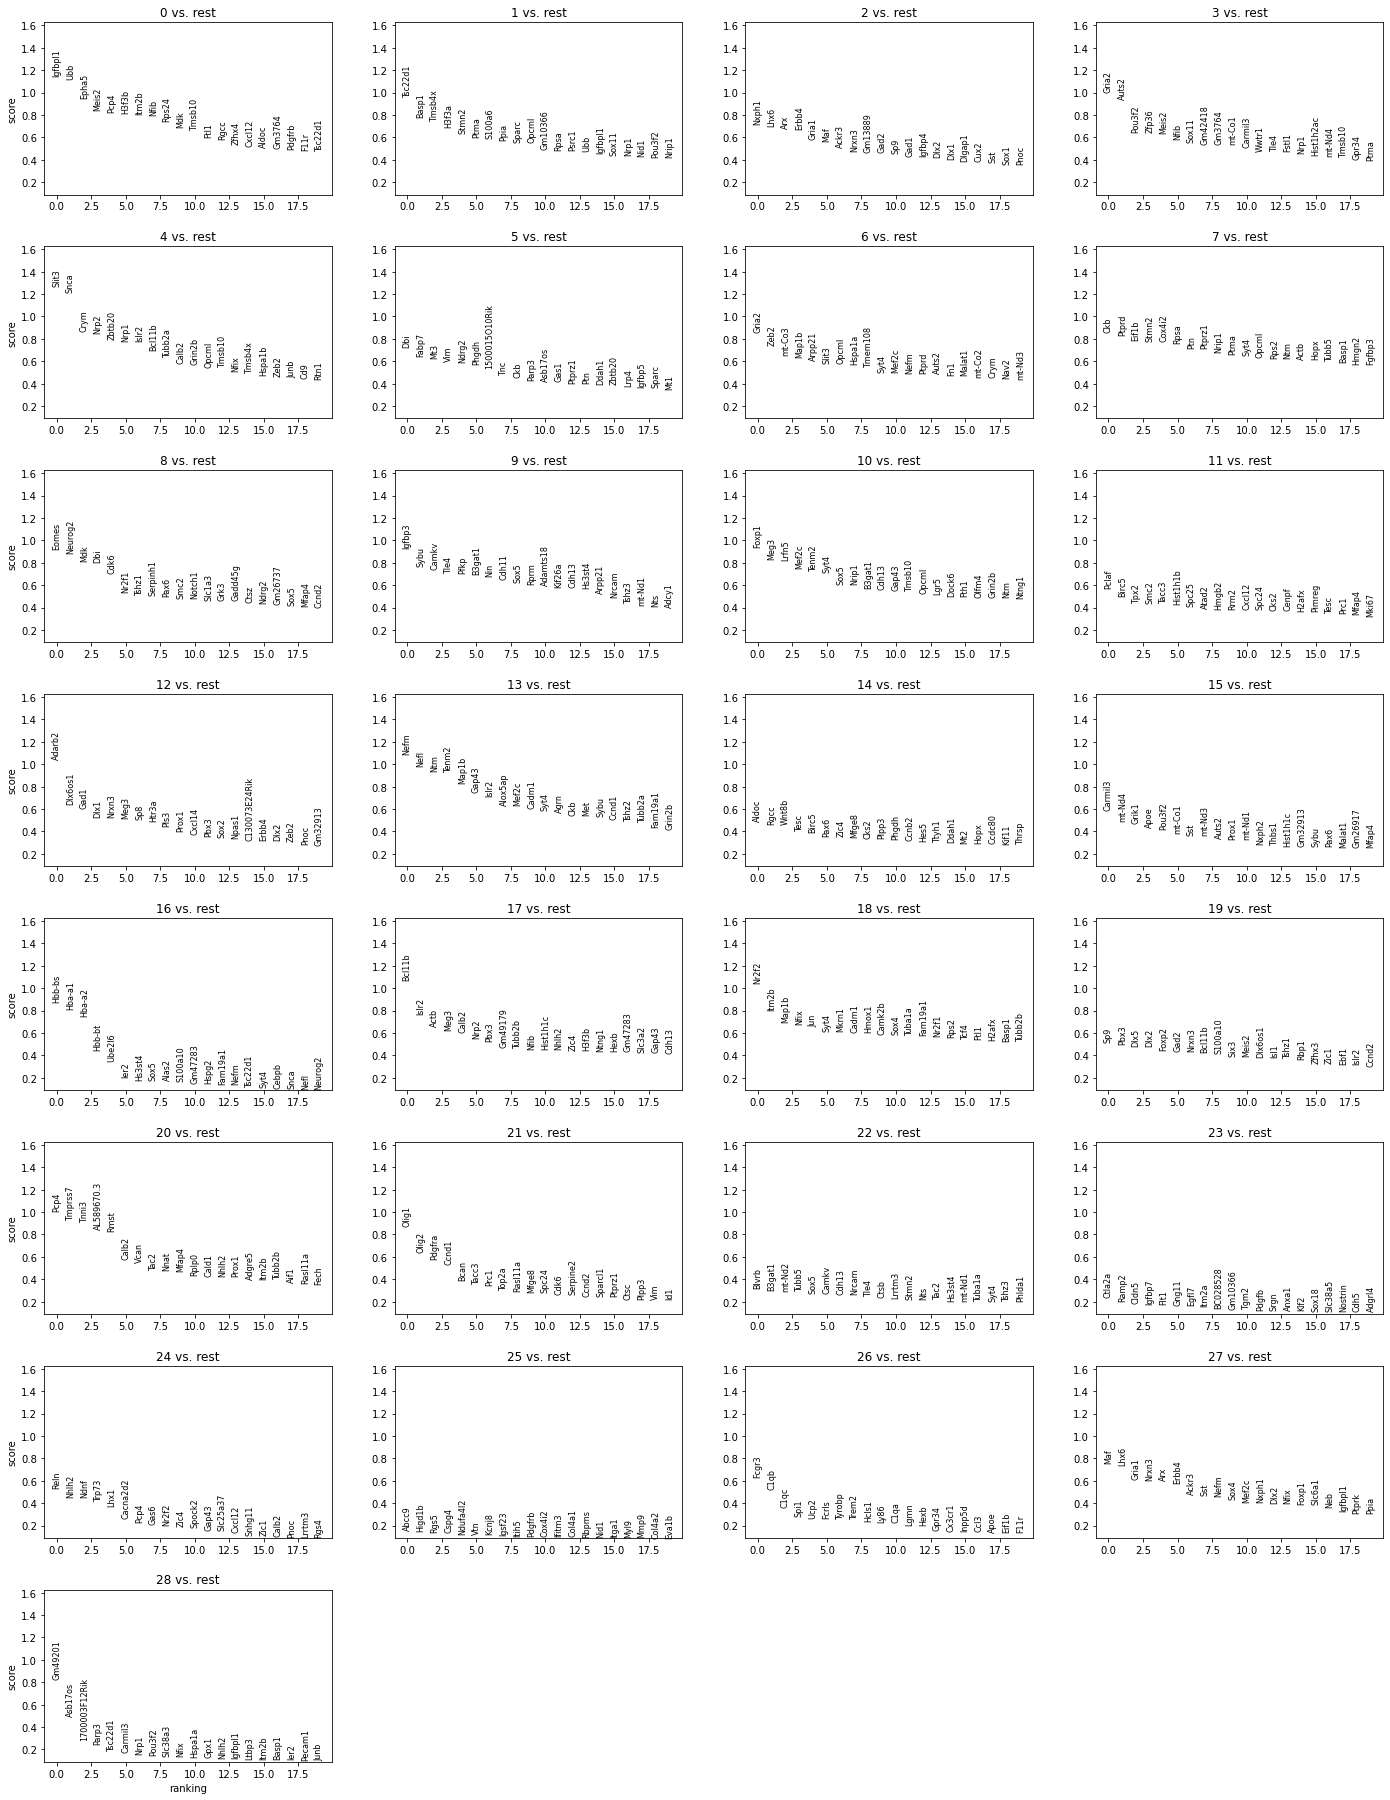

In [10]:
sc.tl.rank_genes_groups(filtered_adata, groupby = 'leiden', method = 'logreg')
sc.pl.rank_genes_groups(filtered_adata)

# Step 4: Cell Types

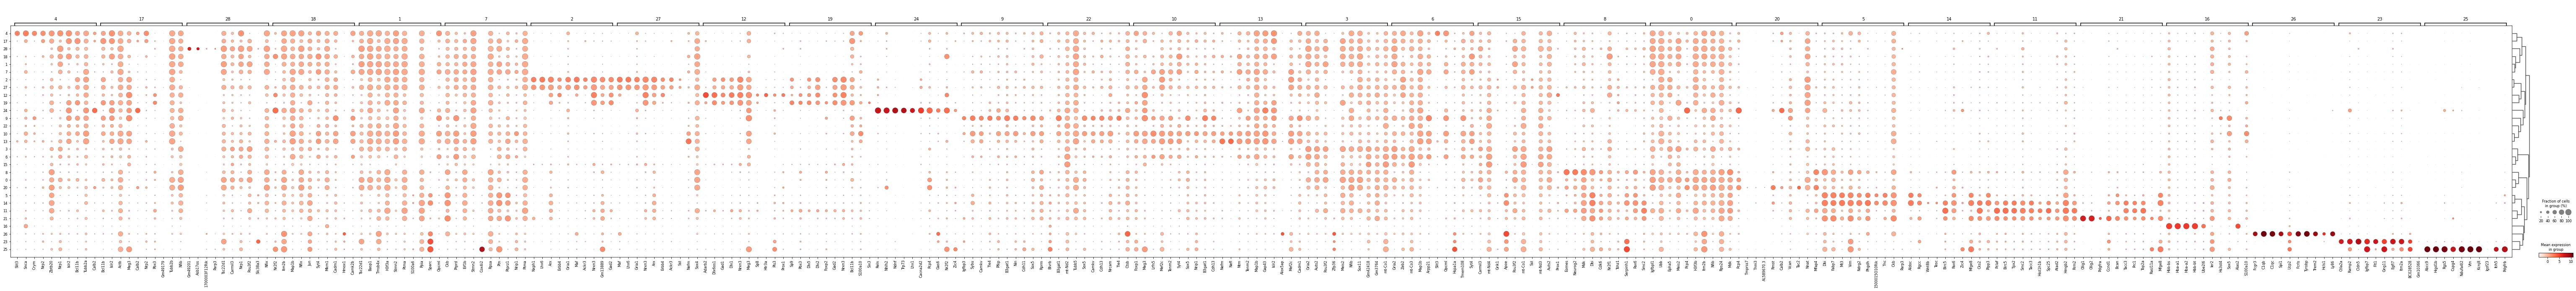

In [13]:
sc.pl.rank_genes_groups_dotplot(filtered_adata, groupby = 'leiden')

In [16]:
markers_dict = {'blood cells' : 'Hbb-bs',
                   'astrocytes':'Aldh1l1',
                   'neurons': 'Reln',
                   'microglia': 'Cx3cr1',
                   'glutamatergic neurons': 'Grin2b',
                   'interneuron': 'Sst',
                   'oligodendrocytes': 'Olig2',
                   'GABAergic neurons': 'Slc6a1'}

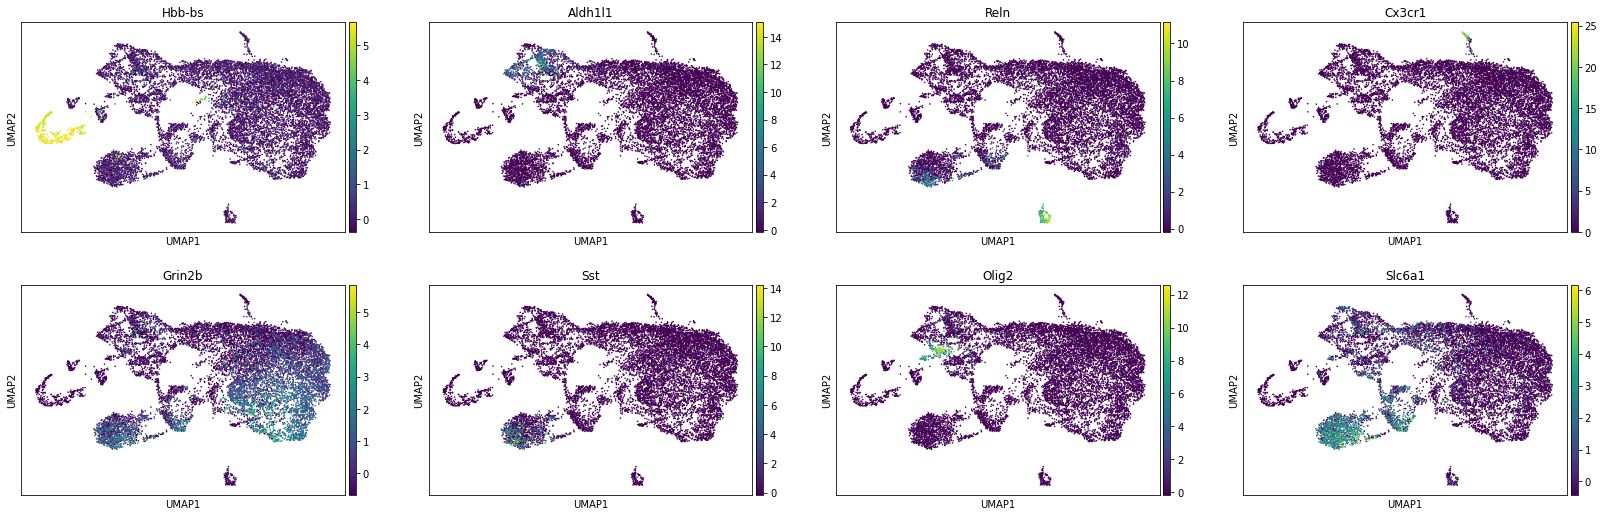

In [17]:
sc.tl.umap(filtered_adata)
sc.pl.umap(filtered_adata, color = list(markers_dict.values()))

categories: 0, 1, 2, etc.
var_group_labels: blood cells, astrocytes, neurons, etc.


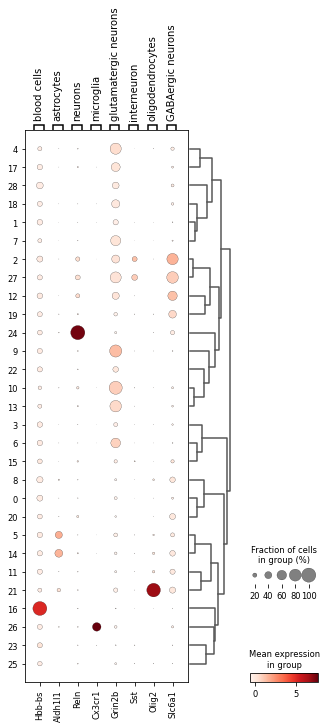

In [26]:
sc.pl.dotplot(filtered_adata, markers_dict, 'leiden', dendrogram=True)

In [22]:
cluster_dict = {
     '16': 'blood cells',
     '5': 'astrocytes',
     '24': 'neurons',
     '26': 'microglia',
     '9': 'glutamatergic neuron',
     '27': 'interneuron',
     '21': 'oligodendrocytes',
     '2': 'GABAergic neurons'}
filtered_adata.obs['cell type'] = filtered_adata.obs['leiden'].map(cluster_dict).astype('category')

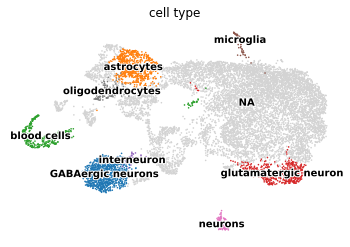

In [27]:
sc.pl.umap(filtered_adata, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=10, legend_fontoutline=2)